In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import pdb
import requests
import matplotlib.pyplot as plt
from collections import defaultdict
import random 
import time

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import *

from functools import wraps
from time import time as _timenow 
from sys import stderr

## Load CIFAR-10 Data

In [2]:
def load_cifar():
    
    trn_data, trn_labels, tst_data, tst_labels = [], [], [], []
    def unpickle(file):
        with open(file, 'rb') as fo:
            data = pickle.load(fo, encoding='latin1')
        return data
    
    for i in trange(1):
        batchName = './data/data_batch_{0}'.format(i + 1)
        unpickled = unpickle(batchName)
        trn_data.extend(unpickled['data'])
        trn_labels.extend(unpickled['labels'])
    unpickled = unpickle('./data/test_batch')
    tst_data.extend(unpickled['data'])
    tst_labels.extend(unpickled['labels'])
    return trn_data, trn_labels, tst_data, tst_labels


## Image preprocessing

In [3]:
def image_prep(image):
    processed_image = image
#     m = np.mean(image, axis=0)
#     sd = np.std(image, axis=0)
#     processed_image = image - m
#     processed_image = processed_image/sd
    ''' pre-processes the given image
        performs mean normalization and other such operations'''
    return processed_image

## Dimensionality reduction using PCA

In [4]:
def reduce_dim(**kwargs):
    dim = kwargs['dim']
    train_X = kwargs['train_X']
    train_y = kwargs['train_y']
    ''' performs dimensionality reduction'''
    if kwargs['method'] == 'pca':
        pca = PCA(n_components=dim)
        pca.fit(train_X)
        X_reduced = pca.transform(train_X)
        return pca, X_reduced
    
    if kwargs['method'] == 'lda':
        lda = LinearDiscriminantAnalysis(n_components=dim)
        lda.fit(train_X,train_y)
        X_reduced = lda.transform(train_X)
        return lda, X_reduced        

## Classification using kernel SVM

In [5]:
def classify(X, y, **kwargs):
    ''' trains a classifier by taking input features
        and their respective targets and returns the trained model'''
    if kwargs['method'] == 'Logistic Regression':
        clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
        clf = clf.fit(X, y)
        return clf
    if kwargs['method'] == 'Decision Tree':
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(X, y)
        return clf
    if kwargs['method'] == 'MLP':
        clf = MLPClassifier()
        clf = clf.fit(X, y)
        return clf

## Evaluation 

In [6]:
def evaluate(target, predicted):
    f1 = f1_score(target, predicted, average='micro')
    acc = accuracy_score(target, predicted)
    return f1, acc

In [7]:
def test(**kwargs):
    classifer_model = kwargs['classifer_model']
    test_X = kwargs['test_X']
    test_y = kwargs['test_y']
    predicted_y = classifer_model.predict(test_X)
    f1, acc = evaluate(test_y, predicted=predicted_y)
    print(f1)
    print(acc)
    return f1, acc

In [8]:
dec_PCA_acc = []
dec_PCA_f1 = []
def main1():
    trn_data, trn_labels, tst_data, tst_labels = load_cifar()
    trn_data, tst_data = list(map(image_prep, trn_data)), list(map(image_prep, tst_data))
    X_train, X_val, y_train, y_val = train_test_split(trn_data, trn_labels,test_size = 0.20)

    dims=[1,2,4,8,16,32,64,128,256]

    for dim in dims:
        print(dim)
        reduced_model, X_reduced = reduce_dim(method='lda',dim=dim,train_X = X_train,train_y = y_train)
        classifer_model = classify(X_reduced, y_train, method='MLP')
        test_X_reduced = reduced_model.transform(X_val)
        f1, acc = test(classifer_model=classifer_model,test_X = test_X_reduced, test_y = y_val)
        dec_PCA_acc.append(acc)
        dec_PCA_f1.append(f1)

In [9]:
if __name__ == '__main__':
    main1()

100%|██████████| 1/1 [00:00<00:00, 12.85it/s]


1
0.1715
0.1715
2
0.1945
0.1945
4


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.23
0.23
8


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.2345
0.2345
16


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.2405
0.2405
32


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.2355
0.2355
64


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.2345
0.2345
128


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.24
0.24
256
0.239
0.239


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


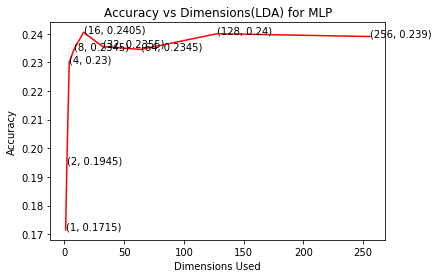

In [10]:
dims=[1,2,4,8,16,32,64,128,256]
for i in range(1,len(dec_PCA_acc)):
#     print(i)
    dec_PCA_f1[i] = round(dec_PCA_f1[i], 3)
#     print(i)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(dims,dec_PCA_acc,'r')
plt.xlabel('Dimensions Used')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Dimensions(LDA) for MLP')
# for xy in zip(dims, dec_PCA_acc):
#     ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.savefig('finalMLP_LDA_accuracy_1.svg',format='svg')

In [11]:
data = {'Dimensions' : dims,
        'Accuracy':dec_PCA_acc,
#         'Score':svm_PCA_f1
       }
p = pd.DataFrame(data)
columnsTitles=["Dimensions","Accuracy"]
p = p.reindex(columns=columnsTitles)
p.index = range(1,10)
# print(p)
# print(svm_PCA_f1)
p

,Dimensions,Accuracy
1,1,0.1715
2,2,0.1945
3,4,0.2300
4,8,0.2345
5,16,0.2405
6,32,0.2355
7,64,0.2345
8,128,0.2400
9,256,0.2390


In [12]:
def sethyperparam(X, y, **kwargs):
     if kwargs['method'] == 'MLP':
            max_iter = kwargs['max_iter']
            learning_rate = kwargs['learning_rate']
            hidden_layer_sizes = kwargs['hidden_layer_sizes']
            solver = kwargs['solver']
            clf = MLPClassifier(solver=solver,learning_rate=learning_rate, max_iter=max_iter, hidden_layer_sizes=hidden_layer_sizes)
            clf = clf.fit(X, y)
            return clf

In [13]:
trn_data, trn_labels, tst_data, tst_labels = load_cifar()
trn_data, tst_data = list(map(image_prep, trn_data)), list(map(image_prep, tst_data))
X_train, X_val, y_train, y_val = train_test_split(trn_data, trn_labels,test_size = 0.20)
 
reduced_model, X_reduced = reduce_dim(method='lda',dim=9,train_X = X_train,train_y = y_train)
test_X_reduced = reduced_model.transform(X_val)
reducedtestdata = reduced_model.transform(tst_data)

100%|██████████| 1/1 [00:00<00:00, 14.56it/s]


In [14]:
max_iter_range = [200,500]
learning_rate_range= ['constant', 'adaptive']
hidden_layer_sizes_range = [(100,20),(100,50),(100,50,10)]
solver_range = ['lbfgs', 'adam']
svm_PCA_acc1 = []
svm_PCA_f11 = []
def main2():
    for solver in solver_range:
        for learning_rate in learning_rate_range:
            for max_iter in max_iter_range:
                for hidden_layer_sizes in hidden_layer_sizes_range:
                    print(solver,learning_rate,max_iter,hidden_layer_sizes)
                    classifer_model = sethyperparam(X_reduced, y_train, method='MLP', solver=solver,learning_rate=learning_rate, max_iter=max_iter, hidden_layer_sizes=hidden_layer_sizes)
                    testf1, testacc = test(classifer_model=classifer_model,test_X = test_X_reduced, test_y = y_val)
                    trainf1, trainacc = test(classifer_model=classifer_model,test_X = X_reduced, test_y = y_train)
                    svm_PCA_acc1.append(testacc)
                    svm_PCA_f11.append(trainacc)
main2()

lbfgs constant 200 (100, 20)
0.2505
0.2505
0.916875
0.916875
lbfgs constant 200 (100, 50)
0.239
0.239
0.950125
0.950125
lbfgs constant 200 (100, 50, 10)
0.253
0.253
0.917875
0.917875
lbfgs constant 500 (100, 20)
0.241
0.241
0.969625
0.969625
lbfgs constant 500 (100, 50)
0.242
0.242
1.0
1.0
lbfgs constant 500 (100, 50, 10)
0.2335
0.2335
1.0
1.0
lbfgs adaptive 200 (100, 20)
0.245
0.245
0.9195
0.9195
lbfgs adaptive 200 (100, 50)
0.2475
0.2475
0.96325
0.96325
lbfgs adaptive 200 (100, 50, 10)
0.2625
0.2625
0.926625
0.926625
lbfgs adaptive 500 (100, 20)
0.2515
0.2515
0.96075
0.96075
lbfgs adaptive 500 (100, 50)
0.247
0.247
1.0
1.0
lbfgs adaptive 500 (100, 50, 10)
0.2405
0.2405
0.998125
0.998125
adam constant 200 (100, 20)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.2615
0.2615
0.88675
0.88675
adam constant 200 (100, 50)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.258
0.258
0.909125
0.909125
adam constant 200 (100, 50, 10)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.256
0.256
0.910875
0.910875
adam constant 500 (100, 20)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.253
0.253
0.9175
0.9175
adam constant 500 (100, 50)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.2465
0.2465
0.9695
0.9695
adam constant 500 (100, 50, 10)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.241
0.241
0.983125
0.983125
adam adaptive 200 (100, 20)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.2615
0.2615
0.88375
0.88375
adam adaptive 200 (100, 50)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.2545
0.2545
0.907625
0.907625
adam adaptive 200 (100, 50, 10)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.2615
0.2615
0.914875
0.914875
adam adaptive 500 (100, 20)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.2515
0.2515
0.924125
0.924125
adam adaptive 500 (100, 50)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.249
0.249
0.9695
0.9695
adam adaptive 500 (100, 50, 10)
0.248
0.248
0.9705
0.9705


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [15]:
temp_sol = []
temp_learningrate = []
temp_maxitr = []
temp_hiddenlayer = []

for solver in solver_range:
        for learning_rate in learning_rate_range:
            for max_iter in max_iter_range:
                for hidden_layer_sizes in hidden_layer_sizes_range:
                    temp_sol.append(solver)
                    temp_learningrate.append(learning_rate)
                    temp_maxitr.append(max_iter)
                    temp_hiddenlayer.append(hidden_layer_sizes)

In [16]:
print(temp_sol)
print(temp_learningrate)
print(temp_maxitr)
print(temp_hiddenlayer)

['lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam']
['constant', 'constant', 'constant', 'constant', 'constant', 'constant', 'adaptive', 'adaptive', 'adaptive', 'adaptive', 'adaptive', 'adaptive', 'constant', 'constant', 'constant', 'constant', 'constant', 'constant', 'adaptive', 'adaptive', 'adaptive', 'adaptive', 'adaptive', 'adaptive']
[200, 200, 200, 500, 500, 500, 200, 200, 200, 500, 500, 500, 200, 200, 200, 500, 500, 500, 200, 200, 200, 500, 500, 500]
[(100, 20), (100, 50), (100, 50, 10), (100, 20), (100, 50), (100, 50, 10), (100, 20), (100, 50), (100, 50, 10), (100, 20), (100, 50), (100, 50, 10), (100, 20), (100, 50), (100, 50, 10), (100, 20), (100, 50), (100, 50, 10), (100, 20), (100, 50), (100, 50, 10), (100, 20), (100, 50), (100, 50, 10)]


In [17]:
data1 = {'Solver' : temp_sol,
         'Learning Rate' : temp_learningrate,
         'Max iterations': temp_maxitr,
         'Hidden Layers' : temp_hiddenlayer,
         'Test Accuracy' : svm_PCA_acc1,
         'Train Accuracy' : svm_PCA_f11
#         'Score':svm_PCA_f1
       }
p1 = pd.DataFrame(data1)
columnsTitles=["Solver","Learning Rate", "Max iterations","Hidden Layers", "Test Accuracy", "Train Accuracy"]
p1 = p1.reindex(columns=columnsTitles)
p1.index = range(1,25)
p1

,Solver,Learning Rate,Max iterations,Hidden Layers,Test Accuracy,Train Accuracy
1,lbfgs,constant,200,"(100, 20)",0.2505,0.916875
2,lbfgs,constant,200,"(100, 50)",0.2390,0.950125
3,lbfgs,constant,200,"(100, 50, 10)",0.2530,0.917875
4,lbfgs,constant,500,"(100, 20)",0.2410,0.969625
5,lbfgs,constant,500,"(100, 50)",0.2420,1.000000
6,lbfgs,constant,500,"(100, 50, 10)",0.2335,1.000000
7,lbfgs,adaptive,200,"(100, 20)",0.2450,0.919500
8,lbfgs,adaptive,200,"(100, 50)",0.2475,0.963250
9,lbfgs,adaptive,200,"(100, 50, 10)",0.2625,0.926625
10,lbfgs,adaptive,500,"(100, 20)",0.2515,0.960750


In [18]:
classifer_model = sethyperparam(X_reduced, y_train, method='MLP', solver="adam",learning_rate="adaptive", max_iter=200, hidden_layer_sizes=(100,20))
testf1, testacc = test(classifer_model=classifer_model,test_X = test_X_reduced, test_y = y_val)
test(classifer_model=classifer_model,test_X = reducedtestdata, test_y = tst_labels)

/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.263
0.263
0.2354
0.2354


(0.2354, 0.2354)

In [22]:
classifer_model = sethyperparam(X_reduced, y_train, method='MLP', solver="lbfgs",learning_rate="adaptive", max_iter=200, hidden_layer_sizes=(100,50,10))
testf1, testacc = test(classifer_model=classifer_model,test_X = test_X_reduced, test_y = y_val)
test(classifer_model=classifer_model,test_X = reducedtestdata, test_y = tst_labels)

0.2485
0.2485
0.2283
0.2283


(0.2283, 0.2283)

In [23]:
classifer_model = sethyperparam(X_reduced, y_train, method='MLP', solver="adam",learning_rate="constant", max_iter=200, hidden_layer_sizes=(100,20))
testf1, testacc = test(classifer_model=classifer_model,test_X = test_X_reduced, test_y = y_val)
test(classifer_model=classifer_model,test_X = reducedtestdata, test_y = tst_labels)

0.2605
0.2605
0.2357
0.2357


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.2357, 0.2357)